# Car Price Prediction Project

## Project Details

- **Project Title:** Car Price Prediction
- **Notebook 1 Goal:** Exploratory data analysis, data cleaning, feature engineering and baseline models
- **Target:** Price
- **Task:** Supervised Learning (Regression)
- **Metric:** 
  - Primary: RMSE
  - Secondary: MAE
- **Validation:** K-Fold Cross-Validation

# Loading and inspection of dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('car_price_with_errors.csv')
df.head(10)

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Toyota-,Civic,1996.0,5.0,212102.0,Hybrid,AuTOmATIc,66758.0
1,Toyota,Corolla,1999.0,3.9,293523.0,Hybrid.,Automatic,9774.0
2,Ford,Focus_,2010.0,-4.5,288885.0,Diesel,Automatic,42732.0
3,Honda-,C-Class,2020.0,2.1,216759.0,PETroL,Automatic,45986.0
4,Honda,C-Class,1997.0,2.3,280277.0,Petrol,Automatic,0.0
5,Honda,320i,-2004.0,4.6,-249643.0,Electric,Automatic,45244.0
6,Toyota,Focus,2021.0,3.3,277449.0,Hybrid,Manual,79355.0
7,Mercedes,Civic,2016.0,1.7,190564.0,Electric,Automatic.,72759.0
8,Toyota,Corolla,2012.0,2.2,217440.0,Diesel,Manual,20722.0
9,Mercedes,Corolla,2022.0,3.7,136821.0,Diesel,Automatic,18389.0


In [3]:
# initial inspection of dataset
print(df.shape)
print(df.info())
print(df.describe())
print(df.duplicated().value_counts())

(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   float64
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   float64
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB
None
               Year  Engine Size       Mileage          Price
count   1000.000000  1000.000000  1.000000e+03    1000.000000
mean    2077.646473     3.177868  1.556431e+05   43344.433579
std     1444.688830     2.403475  1.401149e+05   37759.957971
min    -2024.000000    -4.500000 -2.841760e+05  -76691.000000
25%     2001.000000     1.900000  6.851675e+04   19864.500000
50%     2010.000000     3

In [4]:
# identify column types
cat_cols = df.select_dtypes(include = 'object').columns.tolist()
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['Make', 'Model', 'Fuel Type', 'Transmission']
Numerical Columns: ['Year', 'Engine Size', 'Mileage', 'Price']


In [5]:
# categorical columns cleaning (start by checking cardinality)
for col in cat_cols:
    print(f"\n {col}")
    print(df[col].unique())



 Make
['Toyota-' 'Toyota' 'Ford' 'Honda-' 'Honda' 'Mercedes' 'BMW' 'Toyota>'
 'Honda ' 'mERcEDeS' 'BMW-' 'MErcedEs' 'Ford_' 'Toyota ' 'bmW' 'Toyota.'
 'Ford-' 'Mercedes.' 'Ford ' 'MeRcEDes' 'ToyOTA' 'BmW' 'fORD' 'Ford>'
 'Toyota_' 'MErcEDes' 'BMW_' 'toyoTa' 'Honda>' 'Mercedes ' 'ford' 'foRD'
 'Mercedes>' 'mErCeDeS' 'BMW ' 'HONDa' 'HoNDA' 'hoNDa' 'foRd' 'Mercedes_'
 'HonDA' 'TOyOtA' 'BMW.' 'BMW>' 'Honda.' 'Ford.' 'HonDa' 'toyOtA'
 'merCEdeS' 'HondA' 'HONda' 'toYotA' 'ToYOTa' 'Bmw' 'tOyotA' 'mERCEdes'
 'forD' 'TOYOta' 'honDa' 'mErcedEs' 'MerCedEs' 'meRcEDEs' 'HOnda' 'ForD'
 'hONDA' 'Mercedes-' 'MERcedeS' 'meRCeDEs' 'MErceDES' 'hoNDA' 'MeRCedes'
 'TOYotA' 'TOyOTa' 'hoNdA' 'Honda_' 'bmw' 'hONDa' 'mErCeDEs' 'toYoTA'
 'hONda' 'HOnDa' 'BMw' 'tOYOTa' 'merCEdEs' 'MeRcEDES' 'merCEDeS' 'tOyota'
 'fORd' 'FOrd' 'MErCeDES' 'toYOta' 'MerCEDes' 'FoRD' 'bMW' 'TOYoTA'
 'mercEdEs' 'hOnDa' 'ToYoTa' 'FOrD' 'MERCedeS' 'ToYoTA' 'TOyota' 'tOYotA'
 'merCEdes' 'MeRcEdes' 'FORD' 'MeRCEDeS' 'mErCedES' 'MERceDEs'

# Cleaning of dataset

In [6]:
"""
   Define cleaning rules for categorical columns
1. Nomalize the data type
2. Remove leading and trailing white spaces
3. Remove symbols and digits
4. Standardize casing
"""
import re

def clean_categorical(series: pd.Series) -> pd.Series:
    cleaned = (
    series
    .astype(str)
    .str.strip()
    .str.replace(r"[^a-zA-Z0-9\s\-]", "", regex=True)
    .str.title()
    )
    
    cleaned = cleaned.replace("", pd.NA)
    return cleaned

# Apply categorical cleaning
df_cat = df[cat_cols].apply(clean_categorical)

# Domain specific corrections
df_cat['Model'] = df_cat['Model'].replace({"Cclass": "C-Class", "I": "360I"})
df_cat['Make'] = df_cat['Make'].replace('Bmw', 'BMW')
df_cat.head(10)

,Make,Model,Fuel Type,Transmission
0,Toyota-,Civic,Hybrid,Automatic
1,Toyota,Corolla,Hybrid,Automatic
2,Ford,Focus,Diesel,Automatic
3,Honda-,C-Class,Petrol,Automatic
4,Honda,C-Class,Petrol,Automatic
5,Honda,320I,Electric,Automatic
6,Toyota,Focus,Hybrid,Manual
7,Mercedes,Civic,Electric,Automatic
8,Toyota,Corolla,Diesel,Manual
9,Mercedes,Corolla,Diesel,Automatic


In [7]:
# Post clean sanity check
for col in df_cat:
    print(f"\n {col}")
    print(df_cat[col].unique())
    


 Make
['Toyota-' 'Toyota' 'Ford' 'Honda-' 'Honda' 'Mercedes' 'BMW' 'Bmw-'
 'Ford-' 'Mercedes-']

 Model
['Civic' 'Corolla' 'Focus' 'C-Class' '320I' 'Focus-' 'C-Class-' 'Civic-'
 '320I-' 'Corolla-']

 Fuel Type
['Hybrid' 'Diesel' 'Petrol' 'Electric' 'Electric-' 'Petrol-' 'Diesel-'
 'Hybrid-']

 Transmission
['Automatic' 'Manual' 'Manual-' 'Automatic-']


In [8]:
"""
Now we commence cleaning for numerical cleaning
By converting all columns to numeric
"""
df_num = df[num_cols].apply(pd.to_numeric, errors="coerce")

"""
Column specific numeric rules
Assumptions:
1. Cars before 1925 are unlikely
2. Engine sizes above 6.0L are rare for passenger vehicle
3. Prices, milage, year, and engine size cannot be negative
"""
df_num.loc[~df_num["Year"].between(1925, 2025), "Year"] = pd.NA 
df_num.loc[df_num["Price"] <= 0, "Price"] = pd.NA
df_num.loc[(df_num["Mileage"] < 0) | (df_num["Mileage"] > 600000), "Mileage"] = pd.NA
df_num.loc[(df_num["Engine Size"] <= 0) | (df_num["Engine Size"] > 6), "Engine Size"] = pd.NA
df_num.head(10)

,Year,Engine Size,Mileage,Price
0,1996.0,5.0,212102.0,66758.0
1,1999.0,3.9,293523.0,9774.0
2,2010.0,NaN,288885.0,42732.0
3,2020.0,2.1,216759.0,45986.0
4,1997.0,2.3,280277.0,NaN
5,NaN,4.6,NaN,45244.0
6,2021.0,3.3,277449.0,79355.0
7,2016.0,1.7,190564.0,72759.0
8,2012.0,2.2,217440.0,20722.0
9,2022.0,3.7,136821.0,18389.0


In [9]:
# Combine cleaned data
assert df_cat.index.equals(df_num.index)
df_clean = pd.concat([df_cat, df_num], axis=1)
df_clean.head(10)

,Make,Model,Fuel Type,Transmission,Year,Engine Size,Mileage,Price
0,Toyota-,Civic,Hybrid,Automatic,1996.0,5.0,212102.0,66758.0
1,Toyota,Corolla,Hybrid,Automatic,1999.0,3.9,293523.0,9774.0
2,Ford,Focus,Diesel,Automatic,2010.0,NaN,288885.0,42732.0
3,Honda-,C-Class,Petrol,Automatic,2020.0,2.1,216759.0,45986.0
4,Honda,C-Class,Petrol,Automatic,1997.0,2.3,280277.0,NaN
5,Honda,320I,Electric,Automatic,NaN,4.6,NaN,45244.0
6,Toyota,Focus,Hybrid,Manual,2021.0,3.3,277449.0,79355.0
7,Mercedes,Civic,Electric,Automatic,2016.0,1.7,190564.0,72759.0
8,Toyota,Corolla,Diesel,Manual,2012.0,2.2,217440.0,20722.0
9,Mercedes,Corolla,Diesel,Automatic,2022.0,3.7,136821.0,18389.0


In [10]:
# After cleaning, we drop all NaN columns on target variable(Price)
df_clean = df_clean.dropna(subset=['Price']).reset_index(drop=True) # drop all null values on target variable
df_clean.shape

(958, 8)

# Exploratory Data Analysis

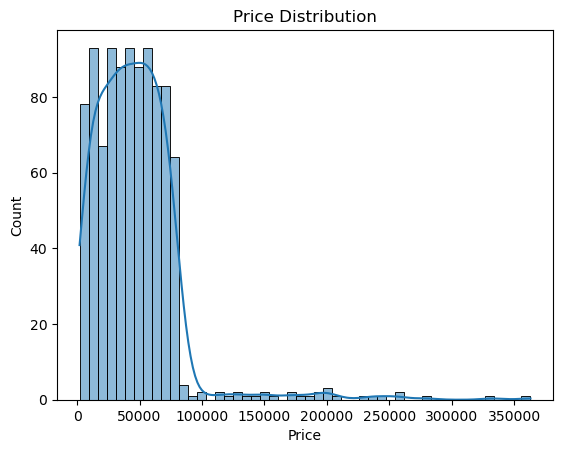

Price skew: 3.22843466258326


In [11]:
# Target variable(Price) analysis(clearly regression)
sns.histplot(df_clean['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

print("Price skew:", df_clean['Price'].skew())

**The plot above shows that price is heavily right skewed therefore, we will have to log_transform later on**

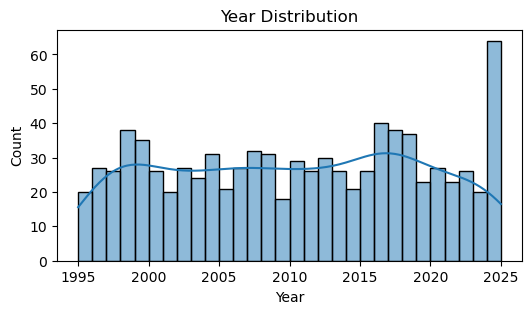

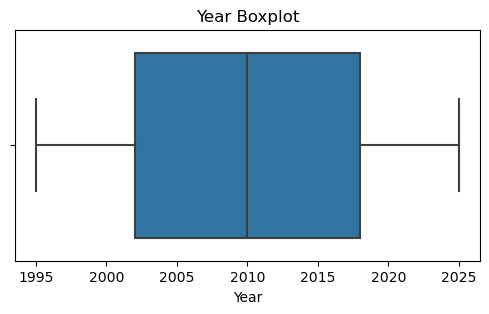

Year correlation with Price: -0.032


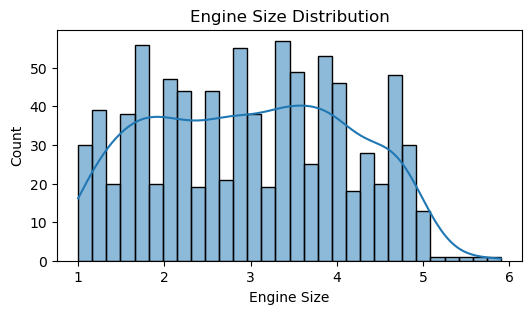

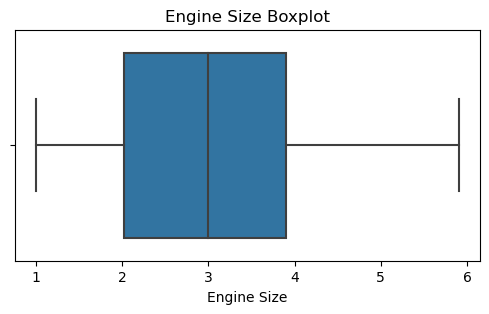

Engine Size correlation with Price: 0.020


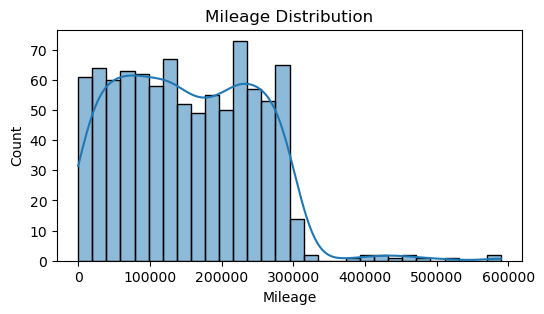

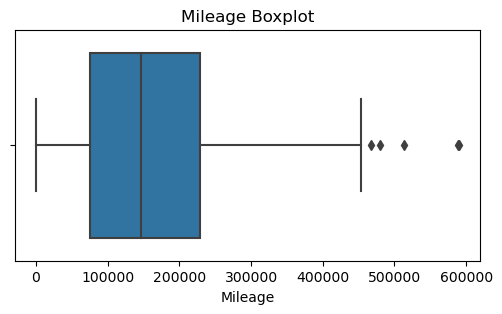

Mileage correlation with Price: 0.032


In [12]:
# Numerical features
num_features = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_features.remove('Price')  # exclude target

for col in num_features:
    # Distribution
    plt.figure(figsize=(6,3))
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()
    
    # Boxplot for outliers
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_clean[col])
    plt.title(f'{col} Boxplot')
    plt.show()
    
    # Correlation with target
    corr = df_clean[[col, 'Price']].corr().iloc[0,1]
    print(f'{col} correlation with Price: {corr:.3f}')

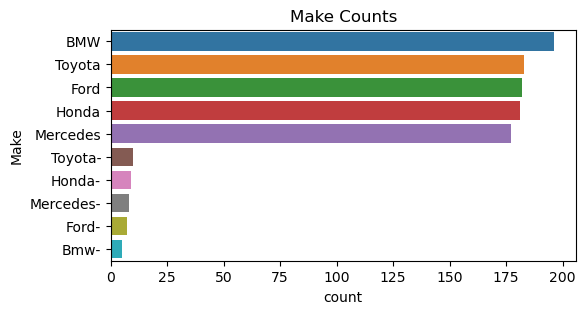

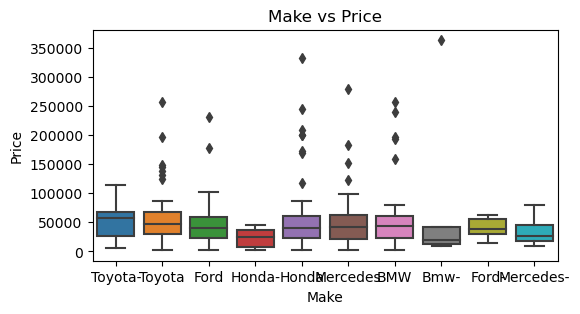

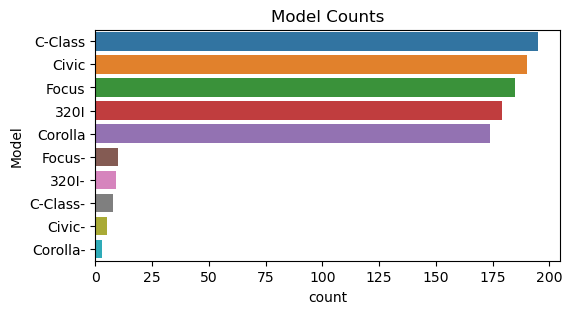

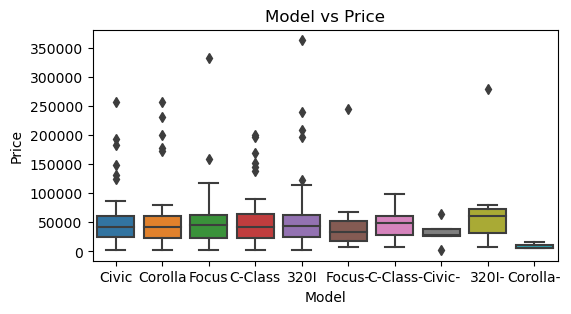

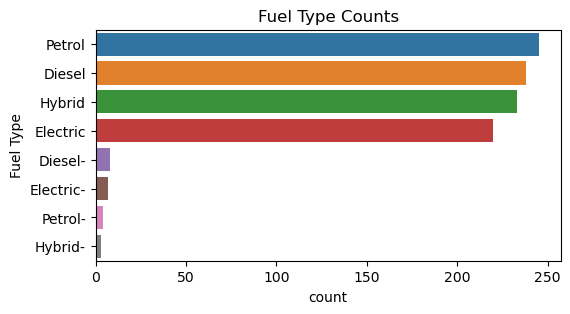

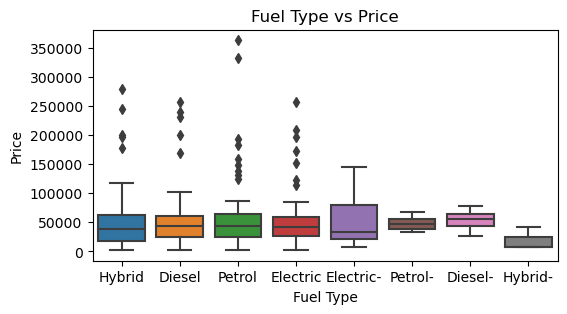

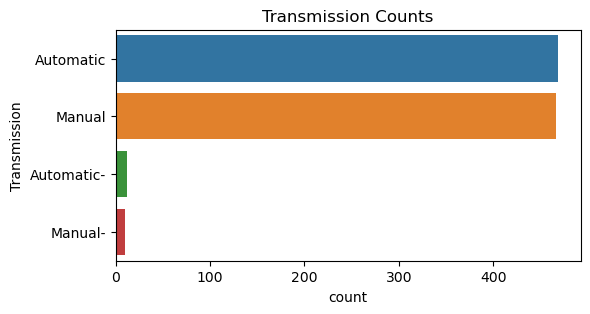

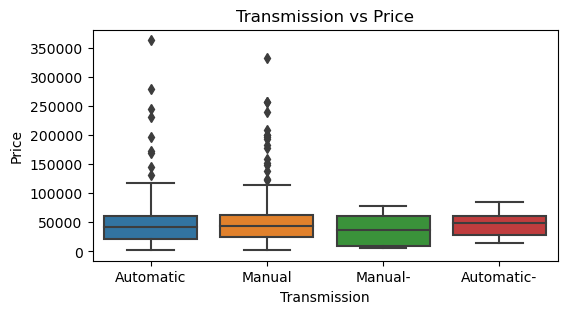

In [13]:
# Categorical features
cat_features = df_clean.select_dtypes(include='object').columns.tolist()

for col in cat_features:
    # Value counts
    plt.figure(figsize=(6,3))
    sns.countplot(y=df_clean[col], order=df_clean[col].value_counts().index)
    plt.title(f'{col} Counts')
    plt.show()
    
    # Relationship with target
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_clean[col], y=df_clean['Price'])
    plt.title(f'{col} vs Price')
    plt.show()

# Target transformation/ Feature splitting
- **From the EDA carried out above, it can be seen that the target is heavily right skewed. Therefore, log-transform is required is required for model stability**
- **Train test split is used to split features into training and validation dataset**

In [14]:
# Set target variable and features
y = np.log1p(df_clean["Price"]) # the target variable log-transformed
x = df_clean.drop("Price", axis=1) #features

In [15]:
# Split the features into training and validation dataset
from sklearn.model_selection import train_test_split, cross_val_score, KFold
train_x, val_x, train_y, val_y = train_test_split(x, y,
                                                  train_size=0.8,
                                                  test_size=0.2,
                                                  random_state=42)

# Build a baseline model

In [16]:
# Import neccessary libraries to build a baseline model(no feature engineering)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Build a preprocessing pipeline
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown = "ignore", sparse_output = False))
])
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "mean")),
    ("scaler", StandardScaler())
])

# Use column transformer to bundle the preprocessing
preprocessor = ColumnTransformer(transformers = [
    ("cat", cat_transformer, cat_features),
    ("num", num_transformer, num_features)
])

# Return dataframe with real column names
preprocessor.set_output(transform="pandas")

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [17]:
# Baseline model pipeline
baseline_model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

In [18]:
# Train the baseline model
baseline_model.fit(train_x, train_y) # Recall that train_y is in log form to help linear model

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [19]:
# Evaluate baseline model
from sklearn.metrics import mean_absolute_error, mean_squared_error
val_preds_log = baseline_model.predict(val_x)
val_preds_real = np.expm1(val_preds_log)
val_y_real = np.expm1(val_y)

rmse = np.sqrt(mean_squared_error(val_y_real, val_preds_real))
mae = mean_absolute_error(val_y_real, val_preds_real)
print("Linear Regression RMSE:", rmse)
print("Linear Regression MAE:", mae)

Linear Regression RMSE: 47299.05930540704
Linear Regression MAE: 25127.43422681649


**The result above establishes the minimum acceptable performance**

# Feature Engineering

In [20]:
# Engineer new features to see if model improves
current_year = train_x['Year'].max()

train_x['Car Age'] = current_year - train_x['Year']
val_x['Car Age'] = current_year - val_x['Year']

train_x = train_x.drop(columns='Year')
val_x = val_x.drop(columns='Year')

In [21]:
train_x

,Make,Model,Fuel Type,Transmission,Engine Size,Mileage,Car Age
302,BMW,Focus-,Hybrid,Manual,1.8,219895.0,28.0
467,Ford,C-Class,Petrol,Manual,3.0,48656.0,18.0
294,Mercedes,Focus,Diesel,Manual,1.2,83290.0,10.0
548,Honda,Focus,Diesel,Manual,NaN,195728.0,NaN
465,Mercedes,Civic,Hybrid,Automatic,3.8,257309.0,22.0
...,...,...,...,...,...,...,...
106,BMW,C-Class,Petrol,Manual,4.5,NaN,29.0
270,Mercedes,320I,Hybrid,Manual,3.4,252810.0,25.0
860,Toyota,C-Class,Hybrid,Automatic,3.3,107684.0,19.0
435,BMW,Civic,Hybrid,Automatic,1.2,139790.0,13.0


In [22]:
# Log transform mileage
train_x['Log_Mileage'] = np.log1p(train_x['Mileage'])
val_x['Log_Mileage'] = np.log1p(val_x['Mileage'])

train_x = train_x.drop('Mileage', axis=1)
val_x = val_x.drop('Mileage', axis=1)

**Feature engineering is done manually here for experimentation. Will be moved into pipeline in notebook 2**

In [23]:
# Re-declare features
cat_features = train_x.select_dtypes(include='object').columns.tolist()
num_features = train_x.select_dtypes(include='float64').columns.tolist()
cat_features, num_features

(['Make', 'Model', 'Fuel Type', 'Transmission'],
 ['Engine Size', 'Car Age', 'Log_Mileage'])

In [24]:
# Rebuild the preprocessing pipeline
cat_transformer = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
num_transformer = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Use column transformer to bundle the preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("cat", cat_transformer, cat_features),
    ("num", num_transformer, num_features)
])
# Return dataframe with real column names
preprocessor.set_output(transform="pandas")

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [25]:
# Rebuild engineered model pipeline
new_linear_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ('model', LinearRegression())
])

In [26]:
# Train the new model
new_linear_model.fit(train_x, train_y)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
# predict with new model
val_preds_log = new_linear_model.predict(val_x)
val_preds_real = np.expm1(val_preds_log)

# Evaluate with new model
rmse = np.sqrt(mean_squared_error(val_y_real, val_preds_real))
mae = mean_absolute_error(val_y_real, val_preds_real)
print("Linear Regression RMSE:", rmse)
print("Linear Regression MAE:", mae)

Linear Regression RMSE: 47332.4443471791
Linear Regression MAE: 25154.518633467338


**Since RMSE does not improve significantly after feature engineering as shown above, we might discard feature later**

In [28]:
# Get feature importance for linear model
coefs = new_linear_model.named_steps['model'].coef_

feature_names = new_linear_model.named_steps['preprocessing'].get_feature_names_out()
feature_importance = (
    pd.Series(coefs, index=feature_names)
    .sort_values(key=np.abs, ascending=False) #absolute value used because magnitude indicate impact
)

feature_importance.head(10)


cat__Model_Corolla-            -0.967867
cat__Fuel Type_Hybrid-         -0.870010
cat__Make_Honda-               -0.564204
cat__Make_Bmw-                 -0.499435
cat__Model_320I-                0.483544
cat__Transmission_Manual-      -0.393033
cat__Make_Toyota                0.336069
cat__Model_Civic-              -0.326695
cat__Transmission_Automatic-    0.312403
cat__Fuel Type_Petrol-          0.295442
dtype: float64

# Cross validation for baseline model

In [30]:
# Cross-Validation (Baseline Sanity Check)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Custom RMSE scorer on real price scale
def rmse_real(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_real, greater_is_better=False)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
cv_scores = cross_val_score(
    new_linear_model,
    train_x,
    train_y,
    cv=kf,
    scoring=rmse_scorer
)

print("Cross-validated RMSE scores:", -cv_scores)
print("Mean CV RMSE:", -cv_scores.mean())
print("Std CV RMSE:", cv_scores.std())


Cross-validated RMSE scores: [38417.5890948  40088.68141982 29056.35395086 38741.64010143
 36164.06293116]
Mean CV RMSE: 36493.66549961243
Std CV RMSE: 3926.8626714810293


**I evaluated my model using 5-fold cross-validation to obtain a robust estimate of performance. The linear regression model achieved a mean RMSE of ~36.5k with moderate variance across folds, indicating stable generalization.**